In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
import warnings
warnings.filterwarnings('ignore') #屏蔽掉pandas提示信息

In [3]:
df = pd.DataFrame()

base = './data/'
files = os.listdir(base)
for f in files:
    if f.endswith('.xlsx') and not f.startswith('~$'): #后者是防止错误读取office缓存文件导致报错
        curdf = pd.read_excel(base + f)
        df = pd.concat([df, curdf])

In [4]:
df.reset_index(inplace = True, drop = True)
df.head(1)

,用户名,博文,发文时间,转发数,评论数,点赞数,用户主页_链接,微博认证,手机型号,超话_链接,话题1,话题2,预选,Unnamed: 0,筛选
0,拱墅检察,#降低刑事责任年龄#【#光明云说法#修改刑事责任年龄能否遏制低龄重罪】近年来，低龄未成年人实...,2020年10月31日 22:17,3.0,1.0,9.0,https://weibo.com/5091956958?refer_flag=100103...,https://verified.weibo.com/verify,iPhone客户端,https://s.weibo.com/weibo/%23%E9%99%8D%E4%BD%8...,#降低刑事责任年龄#,#光明云说法#,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10578 entries, 0 to 10577
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   用户名         10578 non-null  object 
 1   博文          10577 non-null  object 
 2   发文时间        10578 non-null  object 
 3   转发数         2662 non-null   float64
 4   评论数         3109 non-null   float64
 5   点赞数         4306 non-null   float64
 6   用户主页_链接     10578 non-null  object 
 7   微博认证        8699 non-null   object 
 8   手机型号        10197 non-null  object 
 9   超话_链接       10205 non-null  object 
 10  话题1         10205 non-null  object 
 11  话题2         8287 non-null   object 
 12  预选          4 non-null      float64
 13  Unnamed: 0  1 non-null      object 
 14  筛选          215 non-null    float64
dtypes: float64(5), object(10)
memory usage: 1.2+ MB


In [6]:
df.dropna(subset = ['博文'], axis=0, how='any', inplace=True) #如果博文为空,那么这是无效数据,没有价值

In [7]:
df = df[(~df['发文时间'].str.contains('今天')) & (~df['发文时间'].str.contains('前'))] #把'5分钟前', '今天08:56'这些特殊数据扔掉避免读入出错

# 今年的数据没有xxxx年,必须加上
def add_yearnum(x):
    if '年' not in x:
        return '2021年' + x
    return x

df['发文时间'] = df['发文时间'].apply(lambda x: add_yearnum(x))
df['发文时间'] = pd.to_datetime(df['发文时间'], format='%Y年%m月%d日 %H:%M')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10572 entries, 0 to 10577
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   用户名         10572 non-null  object        
 1   博文          10572 non-null  object        
 2   发文时间        10572 non-null  datetime64[ns]
 3   转发数         2657 non-null   float64       
 4   评论数         3103 non-null   float64       
 5   点赞数         4300 non-null   float64       
 6   用户主页_链接     10572 non-null  object        
 7   微博认证        8693 non-null   object        
 8   手机型号        10192 non-null  object        
 9   超话_链接       10200 non-null  object        
 10  话题1         10200 non-null  object        
 11  话题2         8283 non-null   object        
 12  预选          4 non-null      float64       
 13  Unnamed: 0  1 non-null      object        
 14  筛选          215 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(9)
memory usage: 1.3+ MB


In [9]:
# 后面一些项是没有用的,直接删掉
df.drop(['预选', 'Unnamed: 0', '筛选'], inplace = True, axis = 1)

In [10]:
df = df.sort_values(by="发文时间")
df.describe(include = 'all')

,用户名,博文,发文时间,转发数,评论数,点赞数,用户主页_链接,微博认证,手机型号,超话_链接,话题1,话题2
count,10572,10572,10572,2657.000000,3103.000000,4300.000000,10572,8693,10192,10200,10200,8283
unique,7156,6626,6178,NaN,NaN,NaN,7156,4,741,3342,1857,984
top,马浩才,#低龄未成年人刑责范围再调整#【#刑法修正案下调法定最低刑责年龄至12岁#】低龄未成年人严重...,2021-03-27 19:55:00,NaN,NaN,NaN,https://weibo.com/1824339804?refer_flag=100103...,https://verified.weibo.com/verify,微博视频号,https://s.weibo.com/weibo?q=%23%E4%BD%8E%E9%BE...,展开全文c,展开全文c
freq,64,254,425,NaN,NaN,NaN,64,7055,2375,1355,1421,2012
first,NaN,NaN,2018-12-08 10:17:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2021-04-30 21:21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,43.233346,26.297454,240.323488,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,804.551189,331.655639,6865.876338,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df['year'] = df['发文时间'].dt.year
df['month'] = df['发文时间'].dt.month

In [12]:
wb = df[((df['year'] == 2020) & (df['month'] > 10)) | (df['year'] == 2021)] #仅使用2020年11月-2021年4月数据

In [13]:
# 去重,同一人发送多次完全相同内视为无效,仅保留一次
import hashlib

def get_md5(name, post):
    md5_object = hashlib.md5() 
    md5_object.update(name.encode('utf8') + post.encode('utf8'))
    md5_result = md5_object.hexdigest() 
    return md5_result

wb['md5'] = wb.apply(lambda x: get_md5(x['用户名'], x['博文']), axis = 1)

In [14]:
duplicate_count = pd.DataFrame()
duplicate_count['md5'] = wb['md5'].value_counts().index
duplicate_count['cnt'] = wb['md5'].value_counts().values

In [15]:
duplicate_count = duplicate_count[duplicate_count.cnt > 1]
print('重复博文共有{}条'.format(len(duplicate_count)))

重复博文共有261条


给所有的博文都计算有几个权重,方便后续处理(包括去重)

In [16]:
def count_weight(repost, reply, like):
    return repost + 0.5 * reply + 0.2 * like

In [17]:
wb['weight'] = wb.apply(lambda x: count_weight(x['转发数'], x['评论数'], x['点赞数']), axis = 1)

In [18]:
wb['idx'] = wb.index.tolist()
max_weight = dict()
max_weight_index = dict()

def helper(md5, weight, idx):
    if md5 in set(duplicate_count['md5'].tolist()):
        if md5 not in max_weight:
            max_weight[md5] = weight
            max_weight_index[md5] = idx
        else:
            if weight > max_weight[md5]:
                max_weight[md5] = weight
                max_weight_index[md5] = idx

wb.apply(lambda x: helper(x.md5, x.weight, x.idx), axis = 1)

def remover(md5, idx):
    if md5 in max_weight:
        if max_weight_index[md5] != idx:
            wb.drop(idx, inplace = True)

wb.apply(lambda x: remover(x.md5, x.idx), axis = 1)

1158    None
1157    None
1156    None
1155    None
1152    None
        ... 
9856    None
9855    None
9854    None
9853    None
9852    None
Length: 10329, dtype: object

In [19]:
wb = wb.drop(['用户主页_链接', '手机型号', '超话_链接', '话题1', '话题2', '手机型号', 'md5', 'idx'], axis = 1)
wb['ymd'] = wb['发文时间'].dt.date
wb.reset_index(inplace = True, drop = True)

In [20]:
wb.describe(include = 'object')

,用户名,博文,微博认证,ymd
count,9966,9966,8284,9966
unique,7026,6417,4,181
top,马浩才,#低龄未成年人刑责范围再调整#【#刑法修正案下调法定最低刑责年龄至12岁#】低龄未成年人严重...,https://verified.weibo.com/verify,2020-12-26
freq,56,227,6749,1977


In [21]:
wb.describe()

,转发数,评论数,点赞数,year,month,weight
count,2544.000000,2957.000000,4086.000000,9966.000000,9966.000000,1630.000000
mean,44.586478,27.153872,251.302496,2020.496488,7.230885,215.867791
std,822.161449,339.681044,7043.133810,0.500013,4.669893,3406.031663
min,1.000000,1.000000,1.000000,2020.000000,1.000000,1.700000
25%,1.000000,1.000000,1.000000,2020.000000,3.000000,4.900000
50%,2.000000,3.000000,3.000000,2020.000000,11.000000,12.900000
75%,9.000000,10.000000,10.000000,2021.000000,12.000000,36.175000
max,32184.000000,16623.000000,427764.000000,2021.000000,12.000000,126048.300000


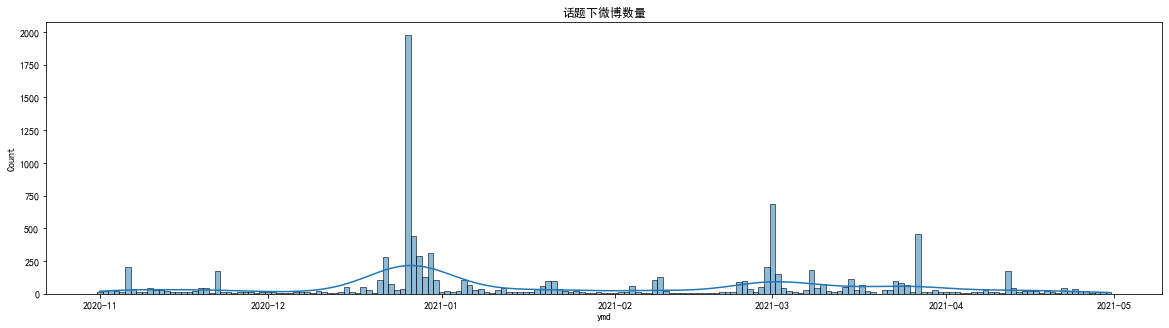

In [22]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.figure(figsize = (20, 5))
sns.histplot(data = wb, x = 'ymd', kde = True)
plt.title('话题下微博数量')
plt.show()

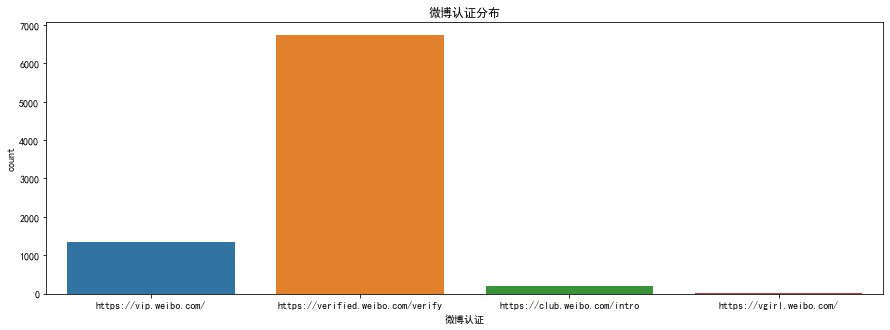

In [23]:
plt.figure(figsize = (15, 5))
sns.countplot(data = wb, x = '微博认证')
plt.title('微博认证分布')
plt.show()

In [24]:
user_ptable = pd.pivot_table(wb, index = ['用户名', '微博认证'], aggfunc={'博文':len})
user_ptable = user_ptable.reindex(user_ptable['博文'].sort_values(ascending=False).index)


检查参与话题最频繁的用户所属认证组

In [25]:
user_ptable.head(20)

,,博文
用户名,微博认证,
马浩才,https://vip.weibo.com/,56
内丘司法,https://verified.weibo.com/verify,18
警硕教育官微,https://vip.weibo.com/,14
西湖检察,https://verified.weibo.com/verify,13
隆尧司法官博,https://verified.weibo.com/verify,13
法硕资料小王子,https://verified.weibo.com/verify,12
天桥法院,https://verified.weibo.com/verify,12
兰州西固检察,https://verified.weibo.com/verify,12
江北检察,https://verified.weibo.com/verify,11


In [26]:
import re
topic_pattern = re.compile("#\w+?#")
def related_topic(x):
    related = re.findall(topic_pattern, x)
    return list(set(related))

wb['related_topic'] = wb['博文'].apply(lambda x: related_topic(x))

In [27]:
from collections import Counter

ls = []
for item in wb['related_topic']:
    ls += item

related_topics = Counter(ls)
topic_df = pd.DataFrame()
topic_df['topic'] = related_topics.keys()
topic_df['count'] = related_topics.values()

topic_df.sort_values(by = 'count', inplace = True, ascending = False)

In [28]:
topic_df.head(20)

,topic,count
445,#低龄未成年人刑责范围再调整#,1504
509,#刑法修正案下调法定最低刑责年龄至12岁#,888
1111,#法定最低刑责年龄个别下调至12岁#,531
1110,#冒名顶替他人入学入刑#,517
520,#刑法最新修改内容#,411
770,#调整低龄未成年人刑责年龄有两个特#,370
608,#最新刑法修正案明年3月施行#,301
609,#奸淫不满10周岁幼女等严重情形可处死刑#,298
446,#法定最低刑事责任年龄下调至12岁#,208
511,#法定最低刑事责任年龄下调至12周岁#,154


In [29]:
referrer_pattern = re.compile("@\w+? ")

def referrer(x):
    referrer = re.findall(referrer_pattern, x)
    return list(set(referrer))

wb['referrers'] = wb['博文'].apply(lambda x: referrer(x))


In [30]:
ls = []
for item in wb['referrers']:
    ls += item

ref_cnt = Counter(ls)
ref_df = pd.DataFrame()
ref_df['topic'] = ref_cnt.keys()
ref_df['count'] = ref_cnt.values()

ref_df.sort_values(by = 'count', inplace = True, ascending = False)

In [31]:
ref_df.head(20)

,topic,count
26,@央视新闻,217
84,@新华视点,101
76,@沸点视频,81
120,@新京报动新闻,63
294,@成都金牛公安,57
10,@大连受害者淇淇妈妈,50
317,@江宁婆婆,47
316,@tereasa莎莎莎莎,47
78,@快手,36
246,@中新视频,34


In [32]:
video_pattern = re.compile("L\w+? ")

def remove_topic(content, topics):
    if topics:
        for topic in topics:
            content = content.replace(topic, '')
        return content
    return content

def remove_referrer(content, referrers):
    if referrers:
        for people in referrers:
            content = content.replace(people, '')
        return content
    return content

def remove_abnormal(content):
    content = content.replace('转发微博', '')
    return content.replace('收起全文d', '')

def remove_video(content):
    return re.sub(video_pattern, '', content)

wb['博文'] = wb.apply(lambda x: remove_topic(x['博文'], x.related_topic), axis = 1)
wb['博文'] = wb.apply(lambda x: remove_referrer(x['博文'], x.referrers), axis = 1)
wb['博文'] = wb['博文'].apply(lambda x: remove_abnormal(x))
wb['博文'] = wb['博文'].apply(lambda x: remove_video(x))

这里使用结巴中文分词工具进行分词, 说明文档:https://github.com/fxsjy/jieba

In [33]:
import jieba

In [34]:
with open('./materials/stops.txt', 'rb') as f:
    stopwords = f.readlines()

stops = set()
for w in stopwords:
    w = w.strip() #去除可能存在的换行号和空格
    stops.add(w.decode('utf8')) #解码为中文

In [35]:
def cut_words(x):
    seg_list = jieba.cut(x, cut_all=False)
    res = ''
    for word in seg_list:
        if word not in stops:
            res += ' ' + word
    return res

wb['words'] = wb['博文'].apply(lambda x: cut_words(x))

all_words = ' '.join(wb['words'].tolist())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Admin\AppData\Local\Temp\jieba.cache
Loading model cost 0.574 seconds.
Prefix dict has been built successfully.


In [36]:
from wordcloud import WordCloud

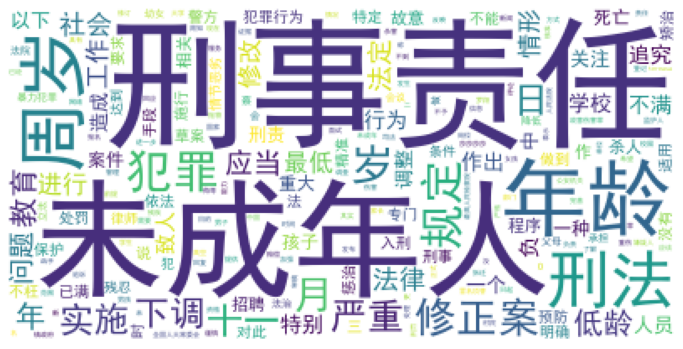

In [37]:
font = r'‪C:\Windows\Fonts\simhei.ttf' #解决wordcloud不支持中文的问题.如果自己的字体安装位置不一样,需要改掉
wc = WordCloud(font_path = font, background_color='white', collocations=False).generate(all_words)
plt.figure(figsize = (12, 8))
plt.imshow(wc)
plt.axis('off')
plt.show()